In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
with open("/content/Ames_Housing_Feature_Description.txt", 'r') as f:
  print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [106]:
df = pd.read_csv("/content/Ames_outliers_removed.csv")

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [108]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [109]:
df = df.drop("PID", axis=1)

In [111]:
len(df.columns)

80

In [115]:
100 * df.isnull().sum() / len(df)

,0
MS SubClass,0.00000
MS Zoning,0.00000
Lot Frontage,16.74069
Lot Area,0.00000
Street,0.00000
...,...
Mo Sold,0.00000
Yr Sold,0.00000
Sale Type,0.00000
Sale Condition,0.00000


In [116]:
def percent_missing(my_df):
  result = 100 * df.isnull().sum() / len(my_df)
  result = result[result > 0].sort_values()
  return result

In [117]:
percent_nan = percent_missing(df)

In [118]:
percent_nan

,0
Total Bsmt SF,0.034165
Bsmt Unf SF,0.034165
BsmtFin SF 2,0.034165
Electrical,0.034165
BsmtFin SF 1,0.034165
Garage Area,0.034165
Garage Cars,0.034165
Bsmt Full Bath,0.068329
Bsmt Half Bath,0.068329
Mas Vnr Area,0.785787


(0.0, 1.0)

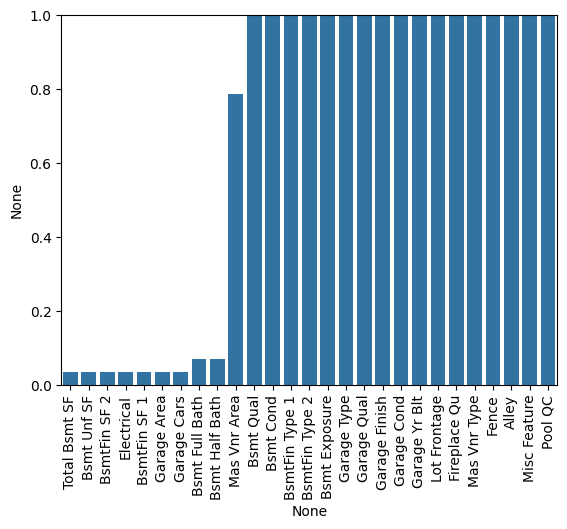

In [122]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [123]:
percent_nan[percent_nan < 1]

,0
Total Bsmt SF,0.034165
Bsmt Unf SF,0.034165
BsmtFin SF 2,0.034165
Electrical,0.034165
BsmtFin SF 1,0.034165
Garage Area,0.034165
Garage Cars,0.034165
Bsmt Full Bath,0.068329
Bsmt Half Bath,0.068329
Mas Vnr Area,0.785787


In [131]:
df[df["Electrical"].isnull()]["Garage Area"]

,Garage Area
1576,400.0


In [132]:
df[df["Bsmt Half Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [133]:
df = df.dropna(axis=0, subset=["Electrical", "Garage Area"])

In [134]:
percent_nan = percent_missing(df)

In [136]:
percent_nan[percent_nan < 1]

,0
Total Bsmt SF,0.034188
Bsmt Unf SF,0.034188
BsmtFin SF 2,0.034188
BsmtFin SF 1,0.034188
Bsmt Full Bath,0.068376
Bsmt Half Bath,0.068376
Mas Vnr Area,0.786325


(0.0, 1.0)

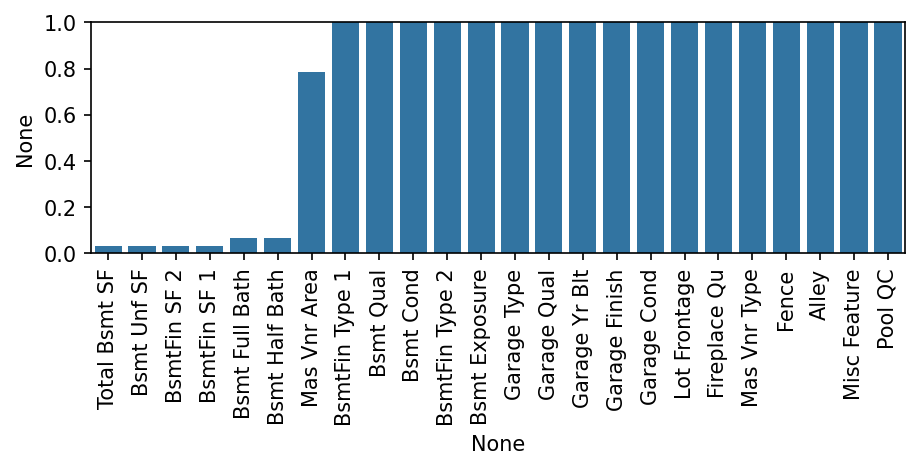

In [144]:
plt.figure(figsize=(7,2), dpi=150)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [145]:
df[df["Bsmt Half Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [146]:
df[df["Bsmt Full Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [147]:
df[df["Bsmt Unf SF"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [148]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

/tmp/ipython-input-1578357234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)


In [149]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

/tmp/ipython-input-1933058151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')


In [150]:
percent_nan = percent_missing(df)

In [151]:
percent_nan[percent_nan < 1]

,0
Mas Vnr Area,0.786325


(0.0, 1.0)

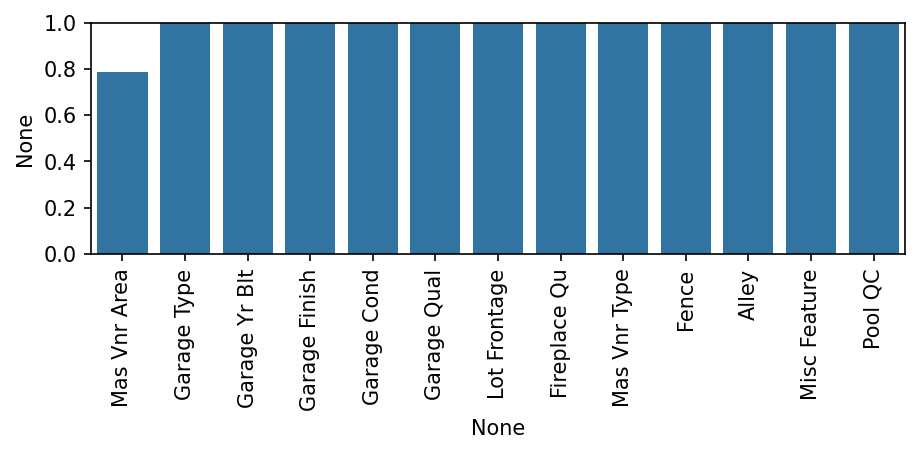

In [152]:
plt.figure(figsize=(7,2), dpi=150)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [155]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")

/tmp/ipython-input-1007565229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")


In [156]:
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

/tmp/ipython-input-1426551918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)


In [157]:
percent_nan = percent_missing(df)

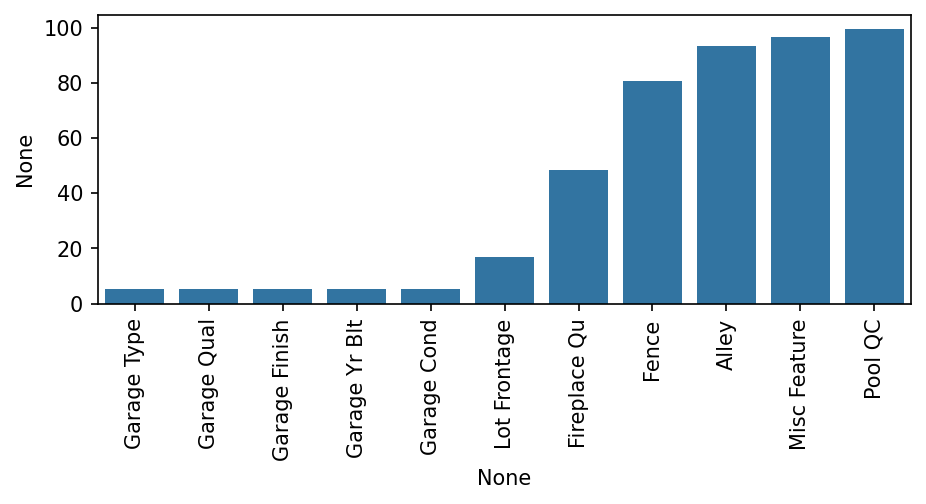

In [161]:
plt.figure(figsize=(7,2.5), dpi=150)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [162]:
garage_str_cols = ['Garage Type', 'Garage Qual', 'Garage Finish','Garage Cond']
df[garage_str_cols] = df[garage_str_cols].fillna('None')

/tmp/ipython-input-489572078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[garage_str_cols] = df[garage_str_cols].fillna('None')


In [163]:
percent_nan = percent_missing(df)

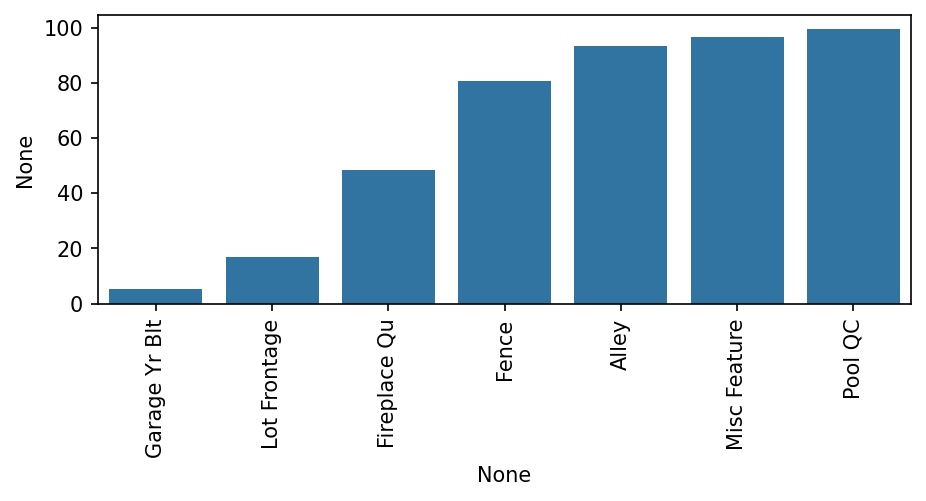

In [164]:
plt.figure(figsize=(7,2.5), dpi=150)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [165]:
df["Garage Yr Blt"] = df["Garage Yr Blt"].fillna(0)

In [166]:
percent_nan = percent_missing(df)

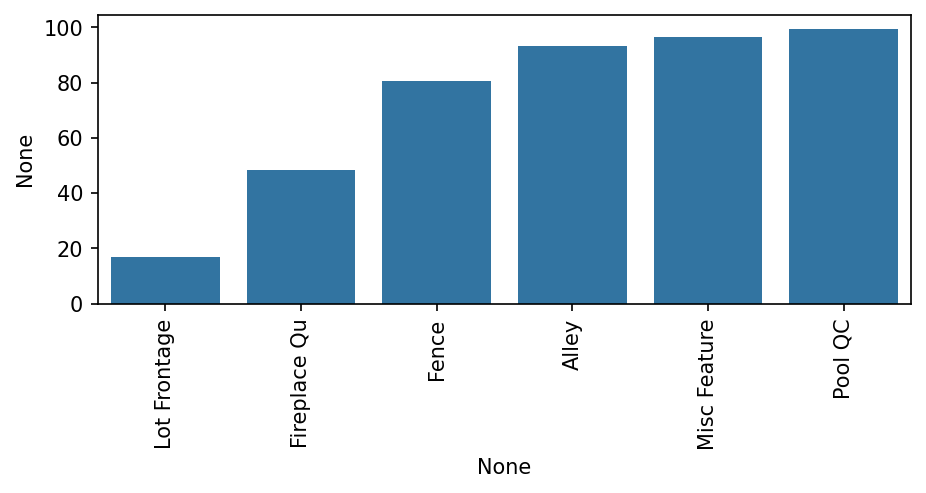

In [167]:
plt.figure(figsize=(7,2.5), dpi=150)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [169]:
df = df.drop(["Pool QC", "Misc Feature", "Alley", "Fence"], axis=1)

In [170]:
percent_nan = percent_missing(df)

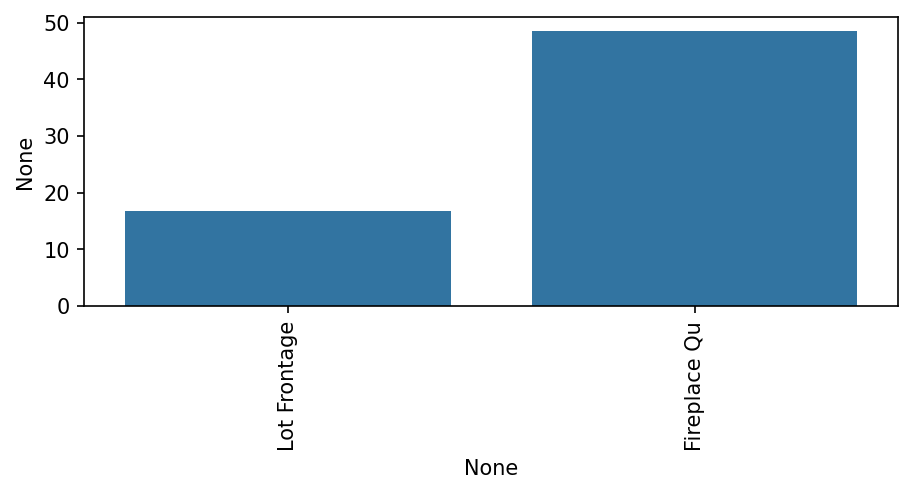

In [171]:
plt.figure(figsize=(7,2.5), dpi=150)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [172]:
percent_nan

,0
Lot Frontage,16.752137
Fireplace Qu,48.547009


In [174]:
df["Fireplace Qu"].value_counts()

,count
Fireplace Qu,
Gd,741
TA,600
Fa,75
Po,46
Ex,43


In [176]:
df["Fireplace Qu"] = df["Fireplace Qu"].fillna('None')

In [177]:
df["Lot Frontage"]

,Lot Frontage
0,141.0
1,80.0
2,81.0
3,93.0
4,74.0
...,...
2922,37.0
2923,NaN
2924,62.0
2925,77.0


<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

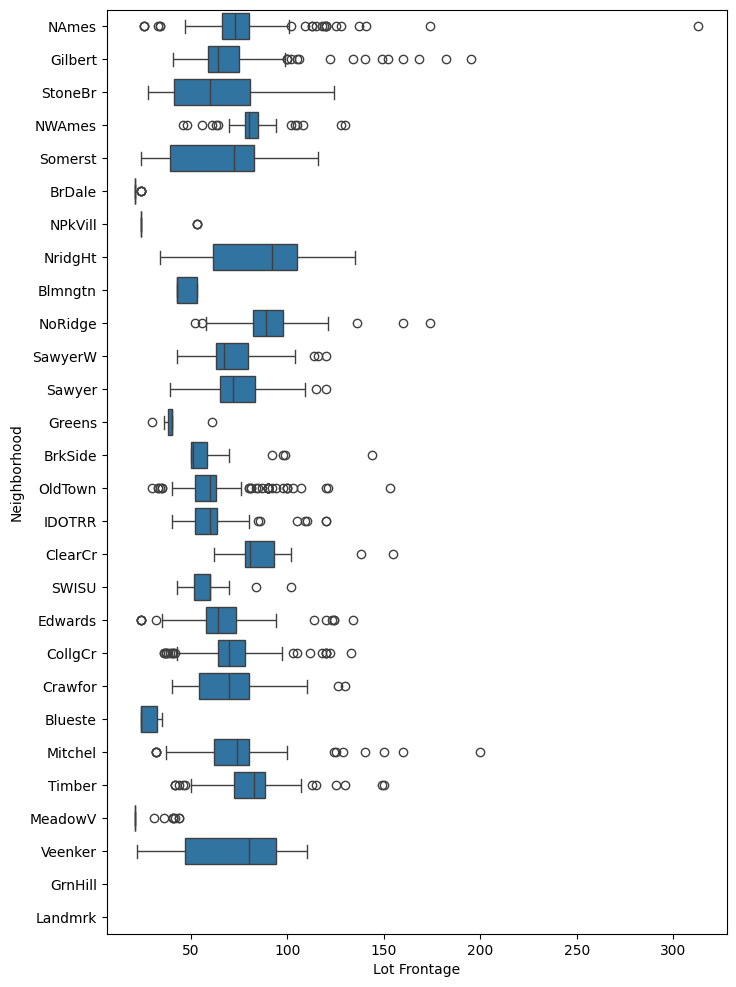

In [182]:
plt.figure(figsize=(8,12), dpi=100)
sns.boxplot(x="Lot Frontage", y="Neighborhood", data=df, orient='h')

In [183]:
df.groupby("Neighborhood")["Lot Frontage"].mean()

,Lot Frontage
Neighborhood,
Blmngtn,46.900000
Blueste,27.300000
BrDale,21.500000
BrkSide,55.789474
ClearCr,88.150000
CollgCr,71.336364
Crawfor,69.951807
Edwards,64.794286
Gilbert,74.207207


In [185]:
df["Lot Frontage"] = df.groupby("Neighborhood")["Lot Frontage"].transform(lambda value: value.fillna(value.mean()))

In [186]:
df["Lot Frontage"].isnull().sum()

np.int64(3)

In [187]:
df["Lot Frontage"] = df["Lot Frontage"].fillna(0)

In [188]:
df["Lot Frontage"].isnull().sum()

np.int64(0)

In [189]:
percent_nan = percent_missing(df)

In [190]:
percent_nan

,0
